# Gradient Descent Implementation

### Author: Nick Koutroumpinis, ML|mind Software Development 

In this tutorial we'll implement one of the most famous optimization techniques called Gradient Descent all the way from scratch... 



Imagine a dataset about <b>bikers</b> we have a feature that represents their biking activity.<br> Our goal is to <b>predict</b> the calories that they lost throughout their activity which is the second variable.. our data looks like this.. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")
data.columns = ['act', 'cals']
print(data)

          act        cals
0   53.426804   68.777596
1   61.530358   62.562382
2   47.475640   71.546632
3   59.813208   87.230925
4   55.142188   78.211518
5   52.211797   79.641973
6   39.299567   59.171489
7   48.105042   75.331242
8   52.550014   71.300880
9   45.419730   55.165677
10  54.351635   82.478847
11  44.164049   62.008923
12  58.168471   75.392870
13  56.727208   81.436192
14  48.955889   60.723602
15  44.687196   82.892504
16  60.297327   97.379897
17  45.618644   48.847153
18  38.816818   56.877213
19  66.189817   83.878565
20  65.416052  118.591217
21  47.481209   57.251819
22  41.575643   51.391744
23  51.845187   75.380652
24  59.370822   74.765564
25  57.310003   95.455053
26  63.615561   95.229366
27  46.737619   79.052406
28  50.556760   83.432071
29  52.223996   63.358790
..        ...         ...
69  31.588117   50.392670
70  53.660932   63.642399
71  46.682229   72.247251
72  43.107820   57.812513
73  70.346076  104.257102
74  44.492856   86.642020
75  57.50453

Now for the second part we have to do some preprocessing in order to get our feature and our label. I'll do it in the most simplistic way using the pandas library.<br>There are more simple ways than this but this is the easiest and most understandable 

In [3]:
def preprocess(data):
    feature = data['act'].values.tolist()
    target = data['cals'].values.tolist()
    
    return feature, target

We'll also implement a function to get our points in a 2d array.

In [5]:
def get_points(data):
    feature, target = preprocess(data)
    points = []
    
    for f, t in zip(feature, target):
        points.append([f,t])
        
    return np.array(points)

And furthermore we are gonna visualize our points in order to get a good idea of how our data looks like in a two dimensional space.. <br> <b>Tip</b>: A good data scientist must always know how his data looks like.

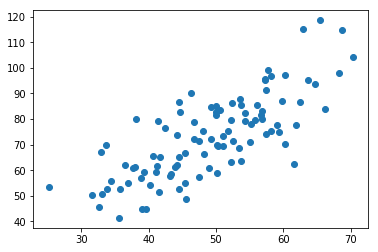

In [4]:
def plot_it(data):
    feature, target = preprocess(data)
    plt.scatter(feature, target)
    plt.show()

plot_it(data)

Clearly we can see some corelation in our data. So now for the part we are all here for... <br>
Let's talk some more about <b> Gradient Descent </b>

To get there, firstly we have to talk about some algebra. <br> Our goal is to draw a line on the points above and fit on that line as many points as we can. <br> We know from algebra that the equation of a straight line is <img src="https://latex.codecogs.com/gif.latex?y&space;=&space;mx&space;&plus;&space;b" title="y = mx + b" />

Graphicaly a straight line is like this..<br> <br> 
<img src="https://www.mathsisfun.com/data/images/y-mxpb-graph.gif" title="y = mx + b" />

<br>So, we can actually understand that we have to find the optimal 'm' and optimal 'b' in order to draw the best line that fits most of our points. <br>
The process to do this is called <b> Gradient Descent </b> and it's one of the most popular optimization techniques of our time.

In order to do that we'll need an error metric.<br> We'll use the sum of squared errors or <b>SSE</b> <img src="http://file.scirp.org/Html/3-1680093/af56ab8f-0660-44e8-bbff-29187940442b.jpg" title="SSE" />. <br>We can define this error metric as a measure of closeness where Y is our already known values (target variable) and Y hat is our predicted (m*x + b) values.

Let's go to the part where i explain how do we get the best fit... It's easy.. We get the best fit when our cost function (error metric) is minimized to it's full potential. <img src="https://iamtrask.github.io/img/sgd_optimal.png" title="sgd" /> To do that we have to calculate the partial derivative of our variables with the purpose to find the optimal values for them. Which means we are searching where our cost function has the lowest result. This is the value we'll take as our m (also doing the same for b). The size of the steps we do is called the learning rate,  and we want this to be a small number so we don't lose the minima because of the big steps we are doing.
<img src="http://home.agh.edu.pl/~horzyk/lectures/ai/GradientDescentOfErrorFunction.jpg" title="sgd" />

Above you can think of w as our m variable. Let's code it up... 

<b>Hint: </b>Watch out for local minima... 

In [6]:
def error(b, m, points):
    total_error = 0
    for i in range(0, len(points)): # iterate through our points
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2  # SSE
    return total_error / float(len(points))

We got the error. Now we have to code a step function because as i said before we are doing really small steps every time in order to find our minima.<br> So, let's code the step gradient.

In [67]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))  # calculate the partial derivative
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) # calculate the partial derivative
    new_b = b_current - (learningRate * b_gradient) # adjustments to our values since we got the new gradient
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m] # return the new values of this step

Now let's implement the gradient descent runner function because we'll do this for a number of itterations

In [11]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b, m]

And for the last part we'll implement a run function with it's only purpose to run our functional code.

In [63]:
def run(data):
    points = get_points(data)
    learning_rate = 0.00001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, error(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, error(b, m, points)))

So let's run this baby and see what it can do.. 

In [64]:
run(data)

Starting gradient descent at b = 0, m = 0, error = 5611.166153823905
Running...
After 1000 iterations b = 0.03630798505774645, m = 1.4809270436632145, error = 111.05814974724268


So we can actually see some results out of this. <br> After 1000 itterations our error got to 111 from 5611 not too shabby right? To conclude the classic gradient descent implementation is more optimized than this. <br> The method i describe is just for learning purposes.... <br> Take your time to understand this, Thanks for your time <br> Cheers